In [2]:
Ns = []
r1s = []
Q2s = []
times = []

with open('logs.txt') as logfile:
    for line in logfile.readlines():
        n, r1, q2, time = line.split()
        n = int(n)
        r1 = int(r1)
        q2 = int(q2)
        time = float(time)
        Ns.append(n)
        r1s.append(r1)
        Q2s.append(q2)
        times.append(time)
Ns[:5], r1s[:5], Q2s[:5], times[:5]

([250, 250, 250, 250, 500],
 [25, 50, 75, 100, 25],
 [1, 1, 1, 1, 1],
 [51.373, 51.383, 51.529, 52.015, 407.309])

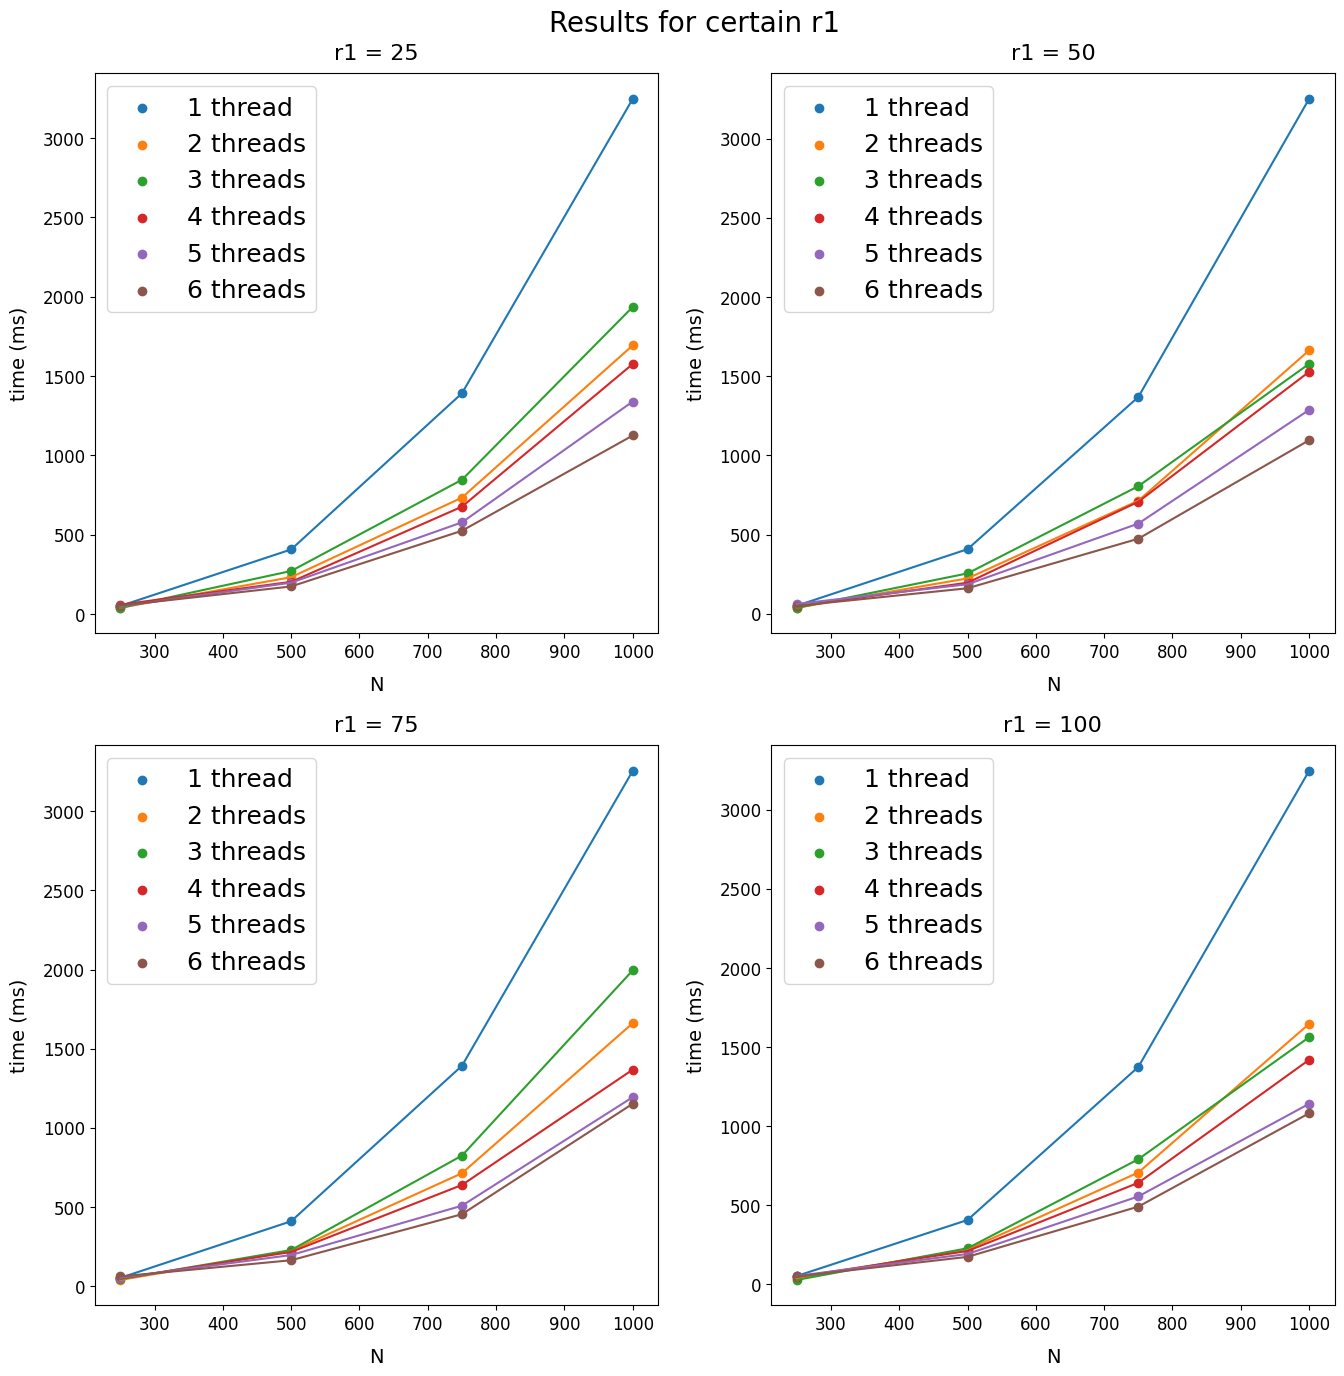

In [4]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(2, 2, figsize = (16, 16))

rs1_unique = np.unique(r1s)
ns_unique = np.unique(Ns)
threads = np.unique(Q2s)

for i in range(0, 2):
    for j in range(0, 2):
        r1 = rs1_unique[2 * i + j]

        fig.suptitle('Results for certain r1', fontsize = 20, y = 0.92)
        ax[i, j].set_title(f'r1 = {r1}', fontsize = 16, pad = 10)
        ax[i, j].set_xlabel('N', fontsize = 14, labelpad = 10)
        ax[i, j].set_ylabel('time (ms)', fontsize = 14, labelpad = 10)
        ax[i, j].tick_params(axis = 'both', which = 'major', labelsize = 12)

        for cur_threads in threads:
            cur_results = []
            for k in range(len(times)):
                if Q2s[k] == cur_threads and r1 == r1s[k]:
                    cur_results.append(times[k])
            ax[i, j].plot(ns_unique, cur_results)
            if cur_threads == 1:
                ax[i, j].scatter(ns_unique, cur_results, label = f'{cur_threads} thread')
            else:
                ax[i, j].scatter(ns_unique, cur_results, label = f'{cur_threads} threads')

        ax[i, j].legend(fontsize = 18)

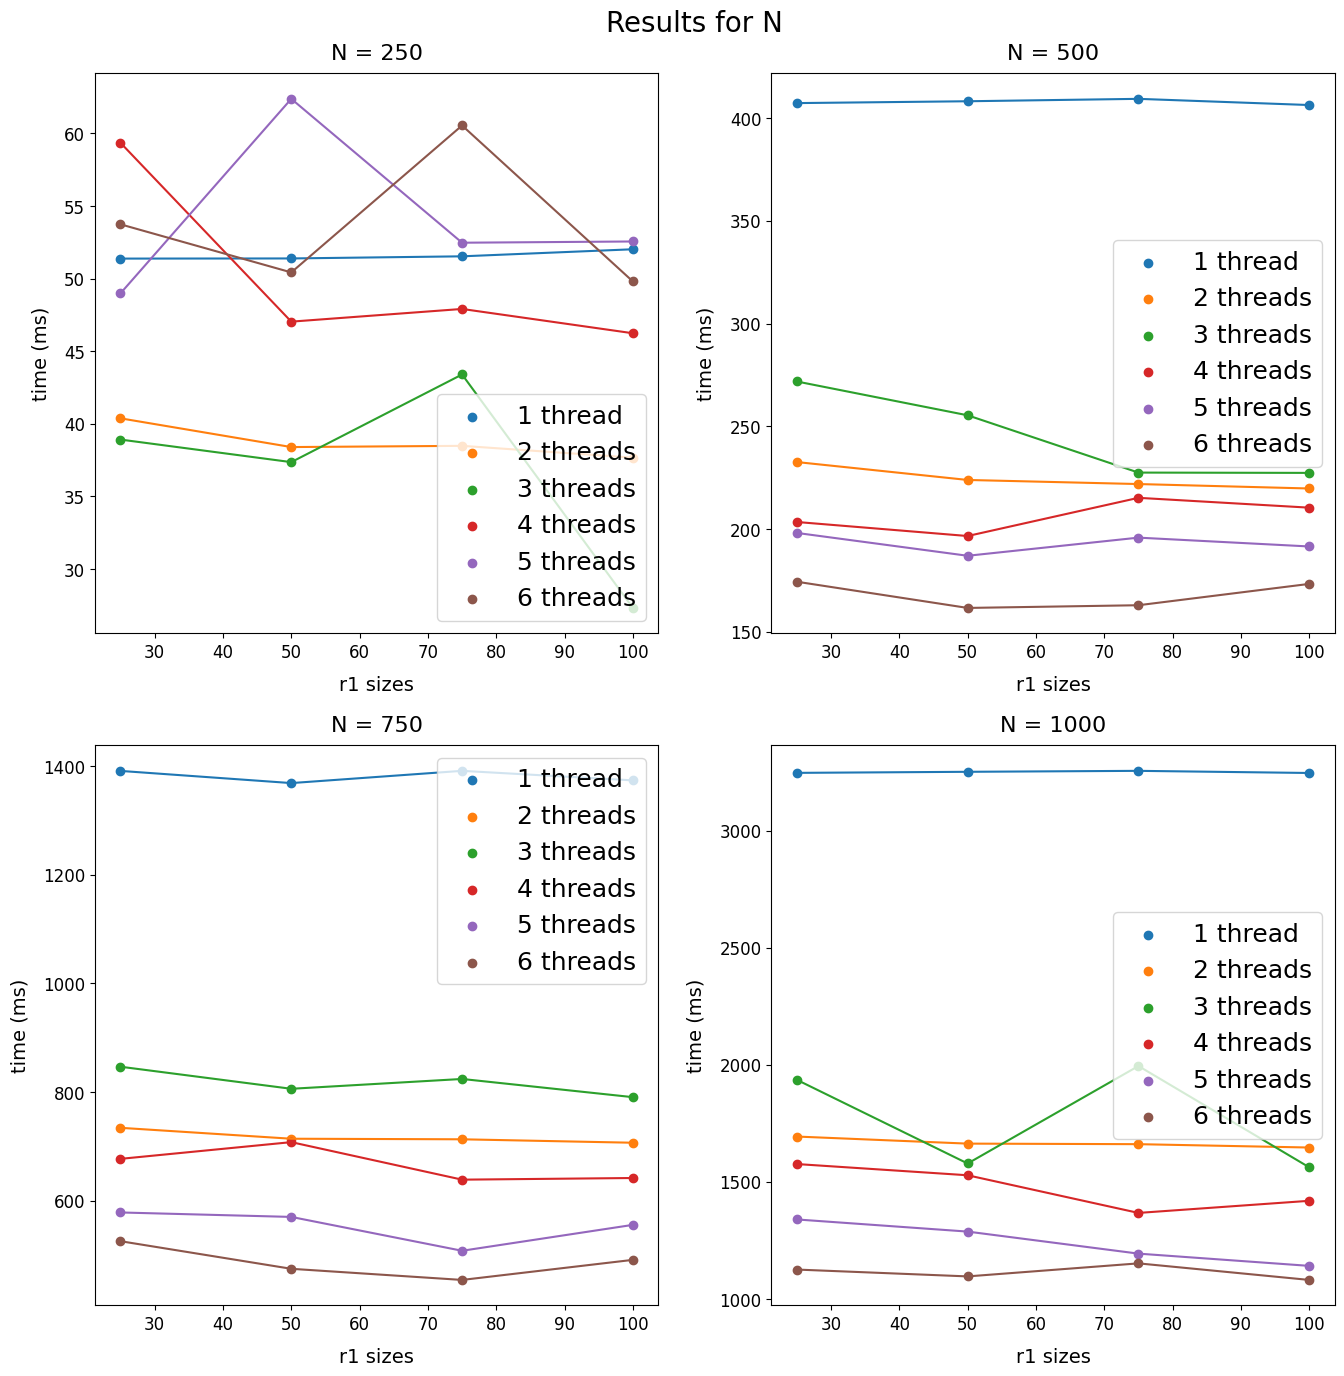

In [6]:
fig, ax = plt.subplots(2, 2, figsize = (16, 16))

for i in range(0, 2):
    for j in range(0, 2):
        n = ns_unique[2 * i + j]

        fig.suptitle(f'Results for N', fontsize = 20, y = 0.92)
        ax[i, j].set_title(f'N = {n}', fontsize = 16, pad = 10)
        ax[i, j].set_xlabel('r1 sizes', fontsize = 14, labelpad = 10)
        ax[i, j].set_ylabel('time (ms)', fontsize = 14, labelpad = 10)
        ax[i, j].tick_params(axis = 'both', which = 'major', labelsize = 12)

        for cur_threads in threads:
            cur_results = []
            for k in range(len(times)):
                if Q2s[k] == cur_threads and n == Ns[k]:
                    cur_results.append(times[k])
            ax[i, j].plot(rs1_unique, cur_results)
            if cur_threads == 1:
                ax[i, j].scatter(rs1_unique, cur_results, label = f'{cur_threads} thread')
            else:
                ax[i, j].scatter(rs1_unique, cur_results, label = f'{cur_threads} threads')

        ax[i, j].legend(fontsize = 18)